# Import Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.2)

# Geneartin Data

In [3]:
raw_data = make_moons(n_samples=700, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[-0.15995017  1.03638621]
 [ 1.13114102 -0.58763612]
 [ 0.16966619  0.09420938]
 [ 0.51772753  0.81518706]
 [-0.68002085  0.15563468]]

[0 1 1 0 0]


In [4]:
df = pd.DataFrame(data=np.c_[data,target], columns=['x1','x2','target'])
df.head()

,x1,x2,target
0,-0.159950,1.036386,0.0
1,1.131141,-0.587636,1.0
2,0.169666,0.094209,1.0
3,0.517728,0.815187,0.0
4,-0.680021,0.155635,0.0


# Data Visualization

In [5]:
px.scatter(df, x='x1', y='x2', color='target', width=700, height=400)

# Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (525, 2)
X_test shape: (175, 2)
y_train shape: (525,)
y_test shape: (175,)


# Visualization Of The Training And Test Set

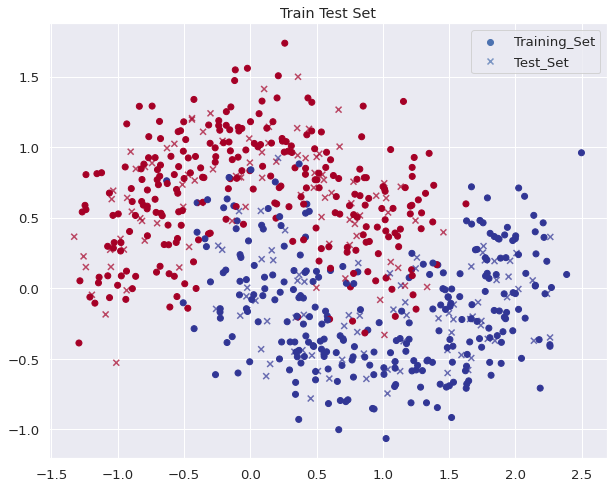

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdYlBu', 
            label = 'Training_Set')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='RdYlBu', marker='x', 
            alpha=0.7, label='Test_Set')
plt.title('Train Test Set')
plt.legend()
plt.show()

# Model Building

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



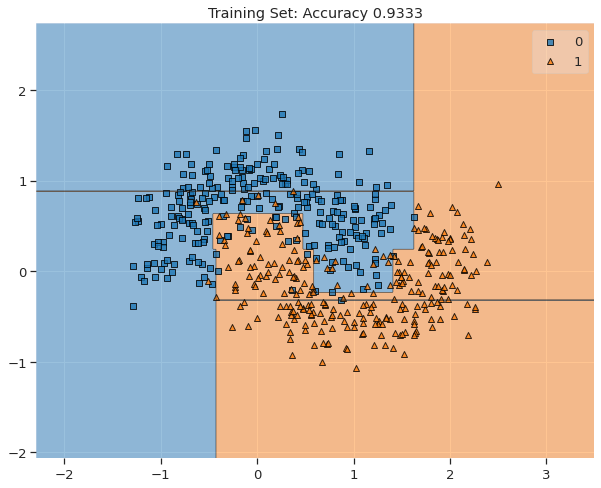

In [9]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Training Set: Accuracy {classifier.score(X_train,y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



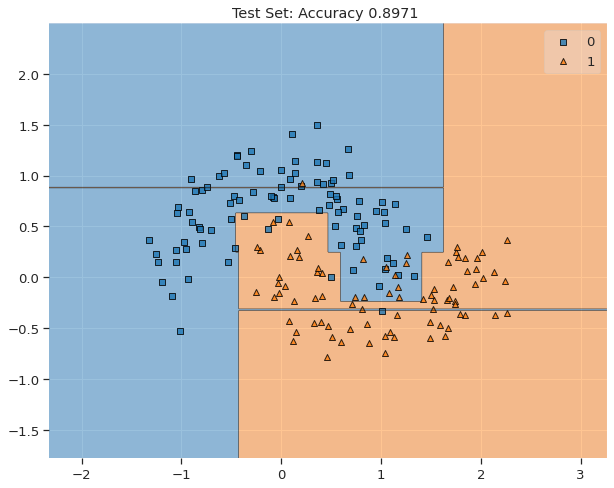

In [10]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Test Set: Accuracy {classifier.score(X_test, y_test):.4f} ')
plt.show()

# Cross Validation

In [11]:
from sklearn.model_selection import cross_val_score

classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

scores = cross_val_score(estimator=classifier,X=X_train, y=y_train, cv=10)
scores

array([0.9245283 , 0.90566038, 0.90566038, 0.94339623, 0.90566038,
       0.90384615, 0.82692308, 0.92307692, 0.88461538, 0.90384615])

In [12]:
print(f'Accuracy: {scores.mean():.4f} (+/-) {scores.std():.4f}')

Accuracy: 0.9027 (+/-) 0.0294


In [14]:
classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=15)
scores

array([0.94285714, 0.91428571, 0.82857143, 0.94285714, 0.91428571,
       0.91428571, 0.94285714, 0.88571429, 0.88571429, 0.85714286,
       0.88571429, 0.88571429, 0.88571429, 0.91428571, 0.88571429])

In [15]:
print(f'Accuracy: {scores.mean():.4f} (+/-) {scores.std():.4f}')

Accuracy: 0.8990 (+/-) 0.0311


In [16]:
scores = pd.DataFrame(scores, columns=['accuracy'])
scores

,accuracy
0,0.942857
1,0.914286
2,0.828571
3,0.942857
4,0.914286
5,0.914286
6,0.942857
7,0.885714
8,0.885714
9,0.857143


In [33]:
px.bar(scores, y='accuracy', color='accuracy', width=700, height=400, 
       title=f'Cross Validation (15 divisions) |'
       f'Accuracy: {scores.mean()[0]:.4f} (+/- {scores.std()[0]:.3f})',
       color_continuous_scale=px.colors.sequential.Inferno_r,
       range_color=[scores.min()[0] - 0.01, 1.0])